#### Workflow for Building and Saving a Text Classification Model (using logistic regression)

Steps for classification
1. Prepare the data: Read in labelled data and preprocess the data
2. Split the data: Separate inputs and outputs into a training set and a test set
3. Numerically encode inputs: Using Count Vectorizer or TF-IDF Vectorizer
4. Fit a model: Fit a model on the training data and apply the fitted model to the test set
5. Evaluate the model: Decide how good the model is by calculating various error metrics
6. Save the model


In [1]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime

#### Step 1: Prepare the data: Read in labelled data and preprocess the data

In [2]:
# Load and make sure the data is labelled

data = pd.read_csv('../assets/SMSSpamCollection.txt', encoding='utf-8' , sep='\t')
data.columns = ['label', 'text']
data.head()


,label,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [3]:
# remove words with numbers, punctuation and capital letters


alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['text'] = data.text.map(alphanumeric).map(punc_lower)
print(data.head())


  label                                               text
0   ham                      ok lar    joking wif u oni   
1  spam  free entry in   a wkly comp to win fa cup fina...
2   ham  u dun say so early hor    u c already then say   
3   ham  nah i don t think he goes to usf  he lives aro...
4  spam  freemsg hey there darling it s been   week s n...


#### Step 2. Split the data: Separate inputs and outputs into a training set and a test set

In [4]:
# split the data into inputs and outputs
X = data.text # inputs into model
Y = data.label # output of model

In [5]:
X.head()

0                        ok lar    joking wif u oni   
1    free entry in   a wkly comp to win fa cup fina...
2    u dun say so early hor    u c already then say   
3    nah i don t think he goes to usf  he lives aro...
4    freemsg hey there darling it s been   week s n...
Name: text, dtype: object

In [6]:
Y.head()

0     ham
1    spam
2     ham
3     ham
4    spam
Name: label, dtype: object

In [7]:
# split the data into a training and test set

# test size = 30% of observations, which means training size = 70% of observations
# random state = 42, so we all get the same random train / test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


''' To see shape
X_tran.head()
X_train.shape
y_train.head()
y_train.shape
'''

In [8]:
X.shape

(5571,)

In [9]:
X_train.shape

(3899,)

In [10]:
X_test.shape

(1672,)

#### 3. Numerically encode inputs: Using Count Vectorizer 

In [11]:


cv = CountVectorizer(stop_words='english', ngram_range=(1,1))

# fit_transform learns the vocab (features) from the test data set, and then fit the test data into vector representation

X_train_cv = cv.fit_transform(X_train) 
# print the features that has been create as a result of fit_transform()
print(cv.get_feature_names())


['aa', 'aah', 'aaooooright', 'aathi', 'ab', 'abbey', 'abeg', 'aberdeen', 'abi', 'ability', 'abiola', 'abj', 'able', 'abnormally', 'aboutas', 'abroad', 'absence', 'absolutely', 'absolutly', 'abt', 'abta', 'abuse', 'ac', 'academic', 'acc', 'accent', 'accept', 'access', 'accessible', 'accidant', 'accident', 'accidentally', 'accommodation', 'accommodationvouchers', 'accomodate', 'accomodations', 'accordin', 'accordingly', 'account', 'accounting', 'accounts', 'accumulation', 'achan', 'ache', 'acid', 'acknowledgement', 'acnt', 'aco', 'acted', 'actin', 'acting', 'action', 'activate', 'active', 'activities', 'actor', 'actual', 'actually', 'ad', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'adding', 'address', 'adds', 'adewale', 'adi', 'adjustable', 'admin', 'administrator', 'admirer', 'admission', 'admit', 'adore', 'adoring', 'adp', 'adress', 'adrian', 'adrink', 'ads', 'adsense', 'adult', 'adults', 'advance', 'adventure', 'advice', 'advise', 'advising', 'advisors', 'aeronautics', '

In [12]:
# transform fit the test data into vector representation based on the vocab fitted from derived features from the prior line
X_test_cv  = cv.transform(X_test) # transform uses the same vocab and one-hot encodes

# print the dimensions of the training set (text messages, terms)
print("Training Data:" , X_train_cv.toarray().shape)
print("Test Data:", X_test_cv.toarray().shape)

Training Data: (3899, 6125)
Test Data: (1672, 6125)


#### 4. Fit a model on the training data and apply the fitted model to the test set
* Use logistic regression model

In [13]:
# Use a logistic regression model

lr = LogisticRegression(solver='lbfgs')

# Train the model
lr.fit(X_train_cv, y_train)

# Take the model that was trained on the X_train_cv data and apply it to the X_test_cv data
y_pred_cv = lr.predict(X_test_cv)
y_pred_cv # The output is all of the predictions


array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

#### 5. Evaluate the model: Decide how good the model is by calculating various error metrics

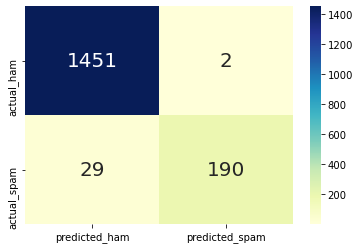

In [14]:

%matplotlib inline

cm = confusion_matrix(y_test, y_pred_cv)
sns.heatmap(cm, xticklabels=['predicted_ham', 'predicted_spam'], yticklabels=['actual_ham', 'actual_spam'], annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

In [15]:

# Retrieves to TP, TN, FN, FP from confusion matrix
true_neg, false_pos = cm[0]
false_neg, true_pos = cm[1]

# Calculate the metric. You can also get the metric using  function direct from Sckit Learn

accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
precision = round((true_pos) / (true_pos + false_pos),3)
recall = round((true_pos) / (true_pos + false_neg),3)    
f1 = round(2 * (precision * recall) / (precision + recall),3)


print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall : {}'.format(recall))
print('F1 Score: {}'.format(f1))



Accuracy: 0.981
Precision: 0.99
Recall : 0.868
F1 Score: 0.925


#### 6. Save the model & count vectorizer into the file directory

In [18]:
# There are two objects that we need to save.

# First, the Count Vectorizer so that we can retained the vocabulary list and 
# other settings to get the features. New text will have to be transformed through the
# Count Vectorizer.

# Second, the Logistic model. This will be used for prediction. 


# We wil name the files with a timestamp on it and save to  folder /outputs

time = datetime.now().strftime("%Y-%m-%d")

classifier_path = '../outputs/classifier-{}.pkl'.format(time)
countvectorizer_path = '../outputs/countvectoriser-{}.pkl'.format(time)


with open(classifier_path, 'wb') as f1:
    pickle.dump(lr, f1)
    
with open(countvectorizer_path, 'wb') as f2:
    pickle.dump(cv, f2)
    


In [19]:
## Note: Look through the files folder. There should be two files created
# e.g. countvectoriser-2020-MM-DD.pkl
# e.g. lr-2020-MM-DD.pkl

!ls -l ../outputs

total 624
-rw-r--r--  1 tanpohkeam  staff  49714 Jul  1 21:52 classifier-2021-07-01.pkl
-rw-r--r--  1 tanpohkeam  staff  49714 Jul  2 10:40 classifier-2021-07-02.pkl
-rw-r--r--  1 tanpohkeam  staff  74021 Jul  1 21:52 countvectoriser-2021-07-01.pkl
-rw-r--r--  1 tanpohkeam  staff  74021 Jul  2 10:40 countvectoriser-2021-07-02.pkl
